In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})

In [6]:
import pandas as pd

df_2016 = pd.read_csv('/kaggle/input/electricity/2016 CAISO Day-Ahead Price.csv')
df_2017 = pd.read_csv('/kaggle/input/electricity/2017 CAISO Day-Ahead Price.csv')
df_2018 = pd.read_csv('/kaggle/input/electricity/2018 CAISO Day-Ahead Price.csv')
df_2019 = pd.read_csv('/kaggle/input/electricity/2019 CAISO Day-Ahead Price.csv')
df_2020 = pd.read_csv('/kaggle/input/electricity/2020 CAISO Day-Ahead Price.csv')
df_2021 = pd.read_csv('/kaggle/input/electricity/2021 CAISO Day-Ahead Price.csv')
df_2022 = pd.read_csv('/kaggle/input/electricity/2022 CAISO Day-Ahead Price.csv')

In [7]:
df_2021.head()


,Date,Price (cents/kWh),Zone
0,1/1/21 0:00,34.98804,PGAE
1,1/1/21 0:00,34.42265,SCE
2,1/1/21 0:00,34.85276,SDGE
3,1/1/21 0:00,33.13579,VEA
4,1/1/21 1:00,33.06633,PGAE


In [8]:
df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)
df = df.sort_values(ascending=True,by='Date')
df.head()

,Date,Price (cents/kWh),Zone
0,1/1/16 0:00,31.53128,PGAE
1,1/1/16 0:00,32.12050,SCE
2,1/1/16 0:00,32.07273,SDGE
3,1/1/16 0:00,31.54402,VEA
42,1/1/16 10:00,23.01530,SDGE


In [9]:
# import warnings
# warnings.filterwarnings("ignore")

df = df.rename(columns= {'Date' : 'DateTime'})
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

,DateTime,Price (cents/kWh),Zone
0,2016-01-01 00:00:00,31.53128,PGAE
1,2016-01-01 00:00:00,32.12050,SCE
2,2016-01-01 00:00:00,32.07273,SDGE
3,2016-01-01 00:00:00,31.54402,VEA
42,2016-01-01 10:00:00,23.01530,SDGE


<h4> pd.to_datetime(df['DateTime']): Converts the 'DateTime' column to datetime format.

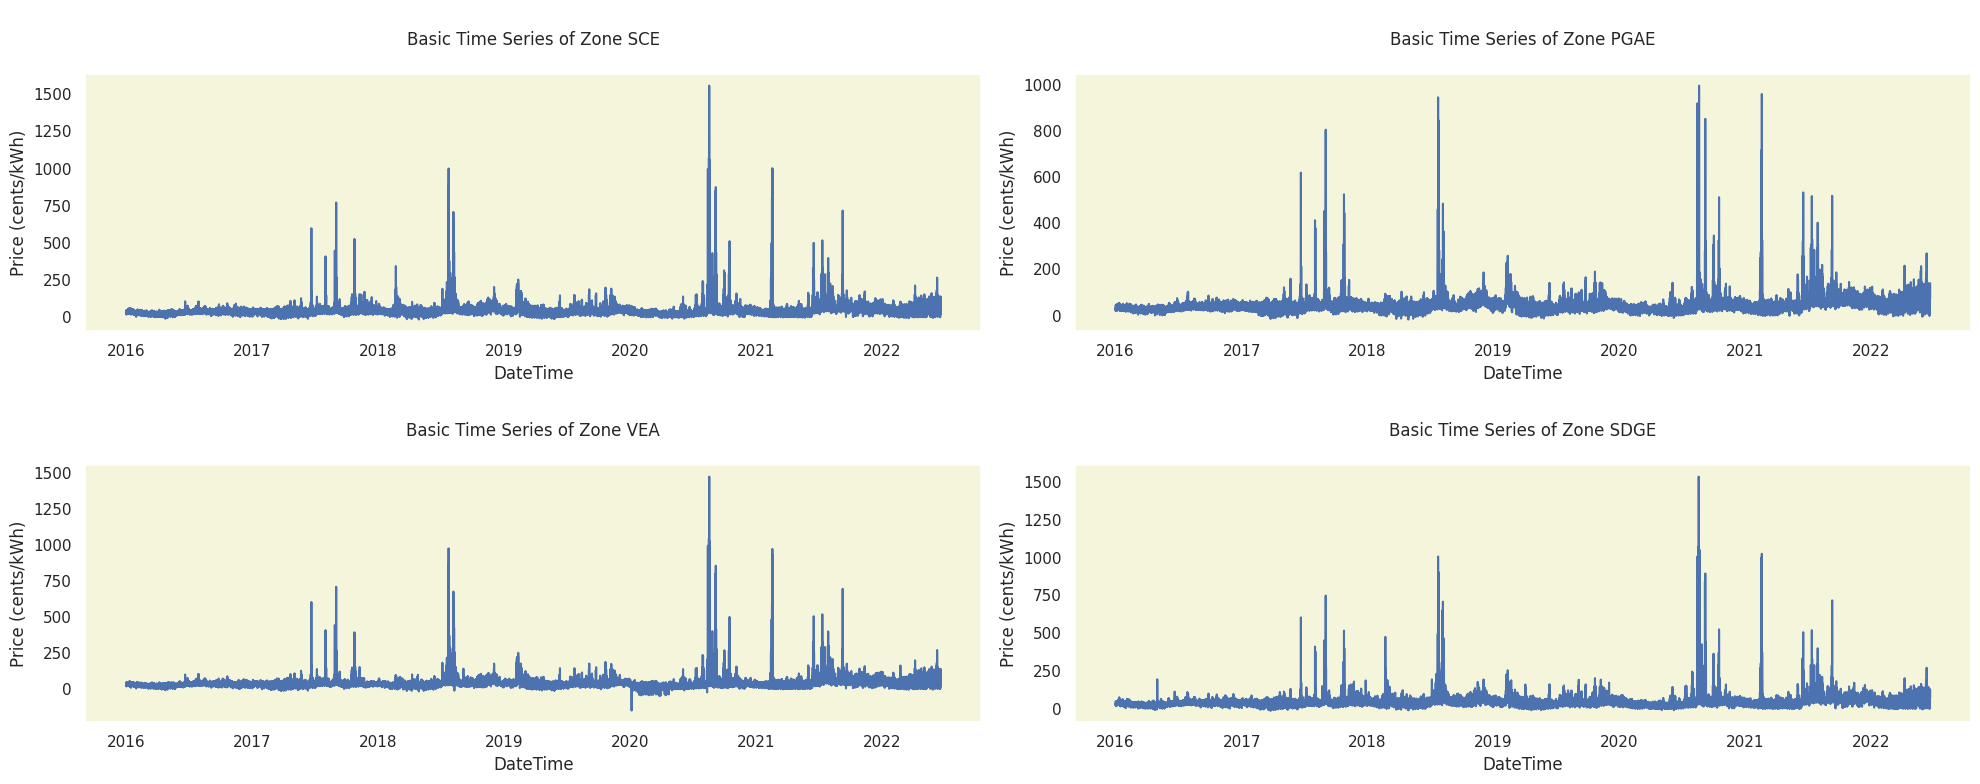

Price (cents/kWh)    float64
dtype: object

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


df_2016 = pd.read_csv('/kaggle/input/electricity/2016 CAISO Day-Ahead Price.csv')
df_2017 = pd.read_csv('/kaggle/input/electricity/2017 CAISO Day-Ahead Price.csv')
df_2018 = pd.read_csv('/kaggle/input/electricity/2018 CAISO Day-Ahead Price.csv')
df_2019 = pd.read_csv('/kaggle/input/electricity/2019 CAISO Day-Ahead Price.csv')
df_2020 = pd.read_csv('/kaggle/input/electricity/2020 CAISO Day-Ahead Price.csv')
df_2021 = pd.read_csv('/kaggle/input/electricity/2021 CAISO Day-Ahead Price.csv')
df_2022 = pd.read_csv('/kaggle/input/electricity/2022 CAISO Day-Ahead Price.csv')
df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)
df = df.rename(columns= {'Date' : 'DateTime'})
df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.head()









# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 8))  # Adjust figsize for desired plot size

# Define zones
zones = ['SCE', 'PGAE', 'VEA', 'SDGE']

# Loop through zones and create subplots
for i, zone in enumerate(zones):
    df_zone = df[df['Zone'] == zone]  # Filter data for each zone
    ax = axes.flat[i]  # Access current subplot using flattening
    sns.lineplot(data=df_zone, x='DateTime', y='Price (cents/kWh)', ax=ax)  # Plot on current subplot
    ax.set_title(f"\nBasic Time Series of Zone {zone}\n", fontsize=12)  # Set title with zone name

# Adjust overall layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

# Display the figure
plt.show()








df_SCE = df[df['Zone'] == 'SCE']
df_SCE = df_SCE.drop('Zone',axis=1)
df_SCE = df_SCE.sort_values(ascending=True,by='DateTime')
df_SCE.head()



df_SCE = df_SCE.set_index('DateTime')
df_SCE.head()










df_SCE.dtypes











In [11]:
df_SCE['DateTime'] = pd.to_datetime(df_SCE['DateTime'])
print(df_SCE.index)  # Should show DatetimeIndex


KeyError: 'DateTime'

In [ ]:
#change to daily frequency
count_date = df_SCE.groupby(df_SCE.index.date)['Price (cents/kWh)'].sum()


df = pd.DataFrame(count_date)
df['DateTime'] = pd.to_datetime(df.index) 
df = df.set_index('DateTime')
df.head()

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Price (cents/kWh)',fontsize=25,color='Red')
plt.plot(df_SCE['Price (cents/kWh)'],color='Red')
plt.xlabel('Date', fontsize=18,color='Blue')
plt.ylabel('Price (cents/kWh)', fontsize=18,color='Blue')
plt.show()

In [15]:
# Selecting Close 
data = df.filter(['Price (cents/kWh)'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

214868

In [16]:
# Scaling the data with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10631868],
       [0.10666377],
       [0.1066358 ],
       ...,
       [0.13131728],
       [0.13184419],
       [0.12989023]])

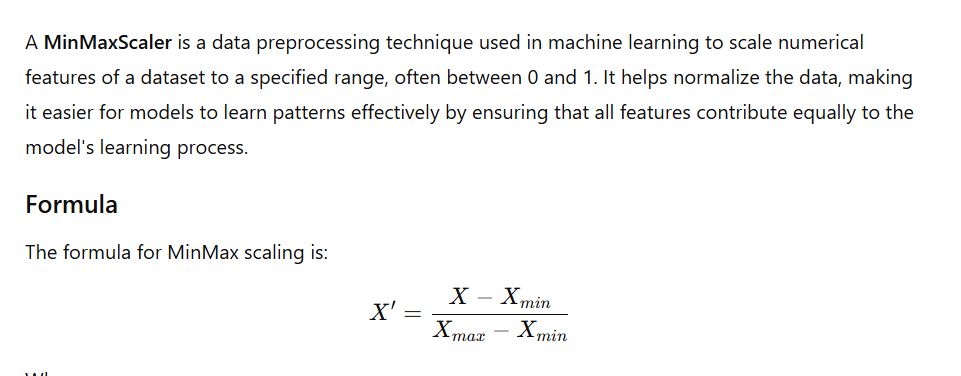

In [17]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.10631868, 0.10666377, 0.1066358 , 0.10632614, 0.10558194,
       0.10581401, 0.10575689, 0.10550875, 0.10554808, 0.10570629,
       0.10564762, 0.10544675, 0.104483  , 0.10467708, 0.1045884 ,
       0.1044462 , 0.104618  , 0.10489705, 0.10480573, 0.10467212,
       0.10528721, 0.10563797, 0.10559214, 0.10542293, 0.10611124,
       0.10632061, 0.10631143, 0.10612961, 0.10574294, 0.10568226,
       0.105643  , 0.10547345, 0.10426767, 0.10395129, 0.10383285,
       0.10370305, 0.10304093, 0.10250664, 0.10240395, 0.10224768,
       0.10185922, 0.10134753, 0.10133107, 0.10111295, 0.10054306,
       0.0999897 , 0.09993028, 0.09976439, 0.09978588, 0.09926917,
       0.09917724, 0.09905737, 0.09983252, 0.09925329, 0.09917636,
       0.09904933, 0.10022215, 0.09973811, 0.0997115 , 0.09954935])]
[0.10214601979822259]

[array([0.10631868, 0.10666377, 0.1066358 , 0.10632614, 0.10558194,
       0.10581401, 0.10575689, 0.10550875, 0.10554808, 0.10570629,
       0.10564762, 0.10544675, 0.10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))   #return_sequences=True ensures the layer outputs a sequence for the next LSTM layer.

model.add(LSTM(64, return_sequences=False))   #Second LSTM layer with 64 units. return_sequences=False- ensures only the final output is passed to the next layer.
model.add(Dense(25))
model.add(Dense(1))

# First dense layer has 25 units (intermediate processing).
# Second dense layer has 1 unit (final prediction, suitable for regression tasks).

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=40,validation_split=0.2)
# Batch Size= 1. Processes one sample at a time (slower, but can be more accurate for small datasets).

model.add(Dropout(0.2))  #To reduce overfitting, add Dropout layers between LSTM layers:


Epoch 1/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 734s 68ms/step - loss: 1.8270e-04 - val_loss: 1.1797e-04
Epoch 2/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 782s 73ms/step - loss: 1.1845e-04 - val_loss: 6.3127e-05
Epoch 3/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 754s 70ms/step - loss: 6.8551e-05 - val_loss: 5.4215e-05
Epoch 4/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 743s 69ms/step - loss: 5.9826e-05 - val_loss: 4.6993e-05
Epoch 5/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 741s 69ms/step - loss: 5.3764e-05 - val_loss: 5.6010e-05
Epoch 6/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 710s 66ms/step - loss: 4.8973e-05 - val_loss: 4.6899e-05
Epoch 7/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 699s 65ms/step - loss: 4.9620e-05 - val_loss: 4.3661e-05
Epoch 8/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 731s 68ms/step - loss: 4.7355e-05 - val_loss: 6.0423e-05
Epoch 9/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 727s 68ms/step - loss: 4.9562e-05 - val_loss: 7.4350e-05
Epoch 10/40
10741/10741 ━━━━━━━━━━━━━━━━━━━━ 720s 67ms/step - loss: 4.6257e-05 - val_loss: 

<h4>Training for only 1 epoch may result in underfitting. You’ll likely need at least 20–50 epochs for meaningful results.
    
    Batch size 1 is computationally expensive. For larger datasets, consider batch sizes of 16, 32, or 64.



</h4>

354/354 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step


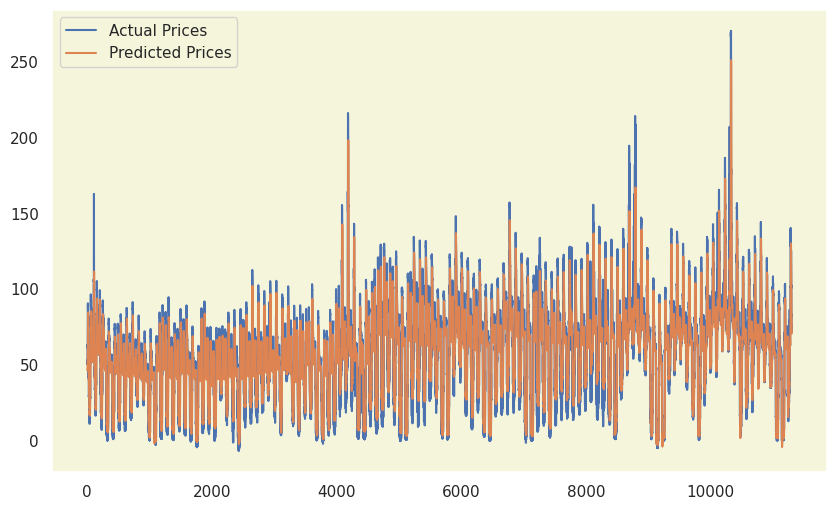

In [21]:
# Create the testing data set
import matplotlib.pyplot as plt


test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

<h3>RMSE (Root Mean Squared Error):
<h4>A common regression metric to measure prediction accuracy.
Lower RMSE indicates better performance.</h4>


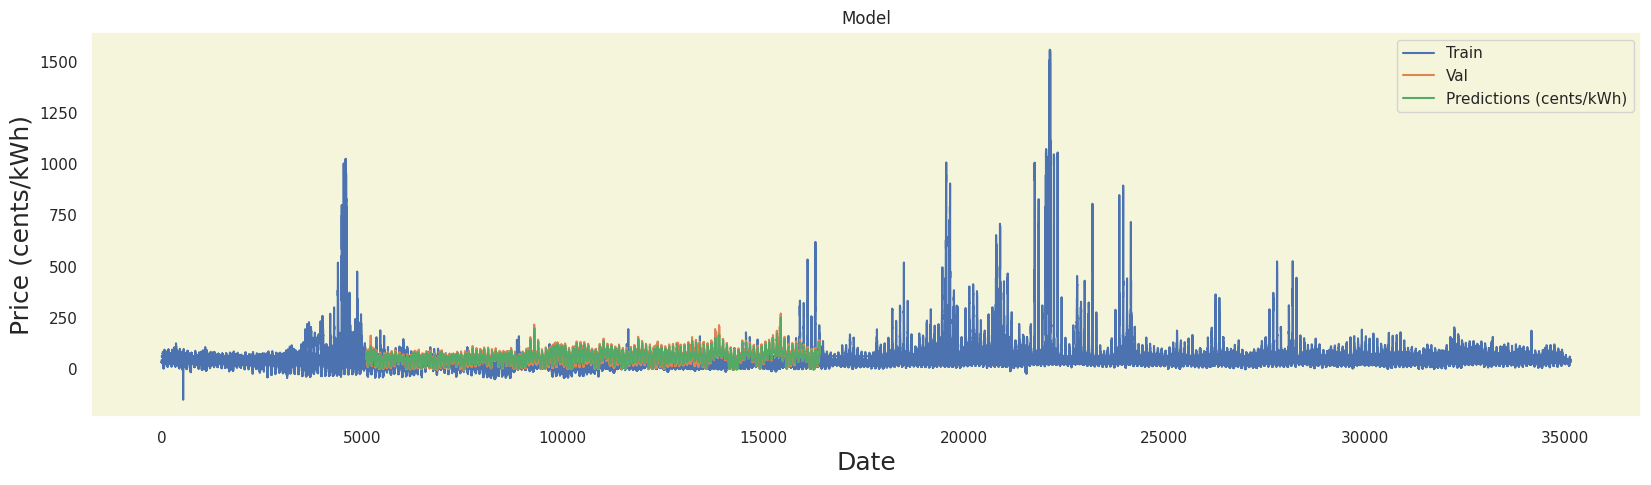

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price (cents/kWh)', fontsize=18)
plt.plot(train['Price (cents/kWh)'])
plt.plot(valid[['Price (cents/kWh)', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions (cents/kWh)'], loc='upper right')
plt.show()

In [24]:
valid['Error'] = valid['Price (cents/kWh)'] - valid['Predictions']
valid.head(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Price (cents/kWh),Predictions,Error
5104,52.977990,46.282349,6.695641
5105,50.409870,46.886955,3.522915
5106,50.656280,47.464832,3.191448
5107,50.299090,47.945709,2.353381
5108,63.282630,48.205315,15.077315
5109,60.951780,50.459251,10.492529
5110,61.459180,53.222538,8.236642
5111,61.498270,55.857372,5.640898
5112,90.577120,57.891258,32.685862
5113,90.535210,64.055412,26.479798


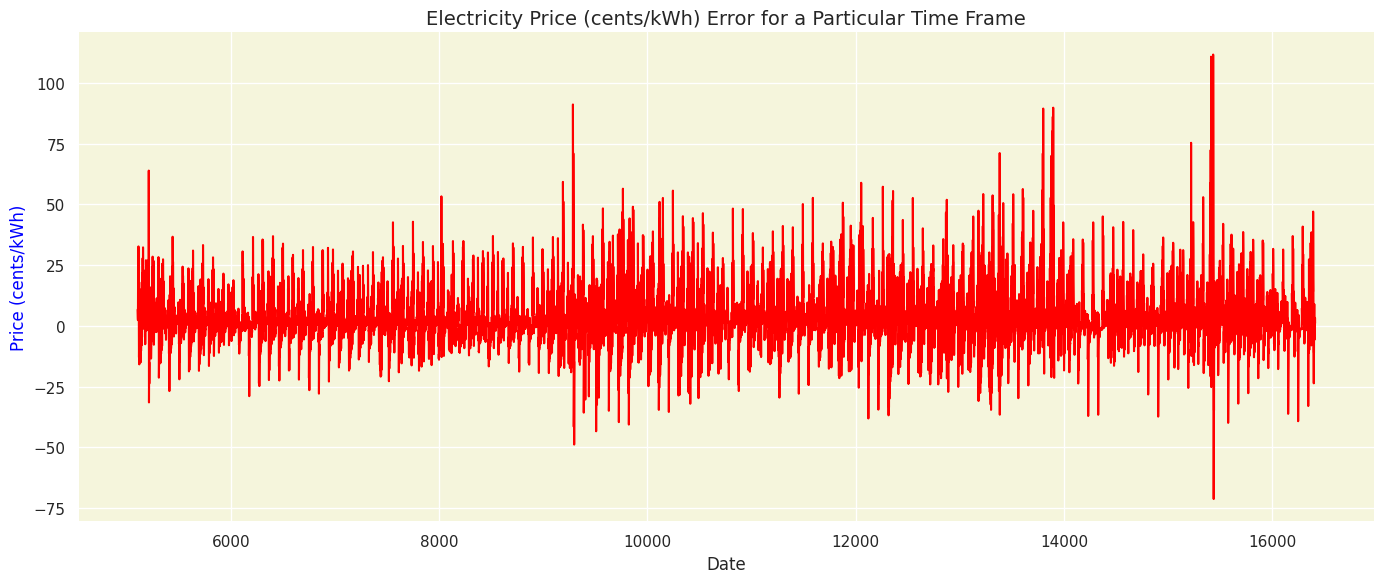

In [25]:
plt.figure(figsize=(14,6))
plt.plot(valid['Error'], color='Red')
plt.ylabel('Price (cents/kWh)', fontsize=12, color= "Blue")
plt.xlabel('Date', fontsize=12)
plt.title('Electricity Price (cents/kWh) Error for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()